In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import RMSprop, Adamax, Adam, Adadelta, SGD, Adagrad, Ftrl, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, roc_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

plt.style.use("fivethirtyeight")
plt.style.use("ggplot")
plt.style.use("tableau-colorblind10")
from warnings import filterwarnings, warn
filterwarnings("ignore")
warn("WARNİNG !!!")

**Here's a breakdown of the columns:**

**ID:** Unique identifier for each entry.

**Customer_ID:** Unique identifier for each customer.

**Month:** Month of the data entry.

**Name:** Customer name (with 9985 missing values).

**Age:** Age of the customer.

**SSN:** Social Security Number.

**Occupation:** Customer's occupation.

**Annual_Income:** Annual income of the customer.

**Monthly_Inhand_Salary:** Monthly salary after deductions (missing 15002 values).

**Num_Bank_Accounts:** Number of bank accounts.

**Num_Credit_Card:** Number of credit cards.

**Interest_Rate:** Interest rate applicable.

**Num_of_Loan:** Number of loans.

**Type_of_Loan:** Type of loan (missing 11408 values).

**Delay_from_due_date:** Delay from due date.

**Num_of_Delayed_Payment:** Number of delayed payments (missing 7002 values).

**Changed_Credit_Limit:** Whether credit limit was changed.

**Num_Credit_Inquiries:** Number of credit inquiries (missing 1965 values).

**Credit_Mix:** Mix of different types of credit.

**Outstanding_Debt:** Amount of outstanding debt. -- odenmemis borc

**Credit_Utilization_Ratio:** Credit utilization ratio.

**Credit_History_Age:** Age of credit history (missing 9030 values).

**Payment_of_Min_Amount:** Payment of minimum amount.

**Total_EMI_per_month:** Total Equated Monthly Installment (EMI). -- aylik geri odenen taksit

**Amount_invested_monthly:** Amount invested monthly (missing 4479 values).

**Payment_Behaviour:** Payment behavior.

**Monthly_Balance:** Monthly balance (missing 1200 values).

**Credit_Score:** Credit score.

To handle the missing values, you could consider various strategies such as imputation, removal of rows with missing values, or treating missing values as a separate category depending on the nature of the data and your analysis goals. 

ID: Unique ID of the record

Customer_ID: Unique ID of the customer

Month: Month of the year

Name: The name of the person

Age: The age of the person

SSN: Social Security Number of the person

Occupation: The occupation of the person

Annual_Income: The Annual Income of the person

Monthly_Inhand_Salary: Monthly in-hand salary of the person


Num_Bank_Accounts: The number of bank accounts of the person

Num_Credit_Card: Number of credit cards the person is having

Interest_Rate: The interest rate on the credit card of the person

Num_of_Loan: The number of loans taken by the person from the bank

Type_of_Loan: The types of loans taken by the person from the bank

Delay_from_due_date: The average number of days delayed by the person from the date of payment

Num_of_Delayed_Payment: Number of payments delayed by the person

Changed_Credit_Card: The percentage change in the credit card limit of the person

Num_Credit_Inquiries: The number of credit card inquiries by the person

Credit_Mix: Classification of Credit Mix of the customer

Outstanding_Debt: The outstanding balance of the person

Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer

Credit_History_Age: The age of the credit history of the person

Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.

Total_EMI_per_month: The total EMI per month of the person

Amount_invested_monthly: The monthly amount invested by the person

Payment_Behaviour: The payment behaviour of the person

Monthly_Balance: The monthly balance left in the account of the person

Credit_Score: The credit score of the person

The Credit_Score column is the target variable in this problem. You are required to find relationships based on how banks classify credit scores and train a model to classify the credit score of a person.



# Read The Data

In [5]:
df = pd.read_csv("train.csv")

In [6]:
df1 = df.copy()

In [7]:
df.shape

(100000, 28)

In [8]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# EDA

https://www.kaggle.com/code/mohamedahmed10000/credit-score-eda-prediction-multi-class

https://www.kaggle.com/code/clkmuhammed/credit-score-classification-part-1-data-cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [11]:
df.isnull().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

In [12]:
df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'], inplace=True)

In [13]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [14]:
df.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [15]:
display(
    df.describe(exclude=np.number).T, 
    print()
)

,count,unique,top,freq
Month,100000,8,January,12500
Age,100000,1788,38,2833
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24


None

In [16]:
object_col = df.describe(include='O').columns
object_col

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [17]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: Month
****************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
END ------------------------------------ 

Column Name: Age
****************************************
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64
END ------------------------------------ 

Column Name: Occupation
****************************************
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int

In [18]:
df.Age

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [19]:
df.select_dtypes(include='number')

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1824.843,3,4,3,3,4.000,26.823,49.575
1,NaN,3,4,3,-1,4.000,31.945,49.575
2,NaN,3,4,3,3,4.000,28.609,49.575
3,NaN,3,4,3,5,4.000,31.378,49.575
4,1824.843,3,4,3,6,4.000,24.797,49.575
...,...,...,...,...,...,...,...,...
99995,3359.416,4,6,7,23,3.000,34.664,35.104
99996,3359.416,4,6,7,18,3.000,40.566,35.104
99997,3359.416,4,6,5729,27,3.000,41.256,35.104
99998,3359.416,4,6,7,20,3.000,33.638,35.104


In [20]:
df.select_dtypes(include='object').head(3)

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


C. Fixing a data type (value_counts(), astype(), infer_objects(), convert_dtypes())
Detect strange values by Columns Convert Object Types to Numeric Types (int, float, np.int64, pd.Int64Dtype())
Combining object columns

Change column type in pandas:

astype() - convert (almost) any type to (almost) any other type (even if it's not necessarily sensible to do so). Also allows you to convert to categorial types (very useful).

infer_objects() - a utility method to convert object columns holding Python objects to a pandas type if possible.

convert_dtypes() - convert DataFrame columns to the "best possible" dtype that supports pd.NA (pandas' object to indicate a missing value).

to_numeric() - provides functionality to safely convert non-numeric types.(See also to_datetime() and to_timedelta().)

factorize() - provides sorting

In [21]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [22]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,NaN,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.416,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.000,NaN,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,May,25,Mechanic,39628.99,3359.416,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.000,NaN,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,June,25,Mechanic,39628.99,3359.416,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.000,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,July,25,Mechanic,39628.99,3359.416,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.000,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard


In [23]:
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int) 
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [24]:
df.select_dtypes(include='number').head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1,23,19114.120,1824.843,3,4,3,4,3,7.000,11.270,4.000,809.980,26.823,49.575,80.415,312.494
1,2,23,19114.120,NaN,3,4,3,4,-1,NaN,11.270,4.000,809.980,31.945,49.575,118.280,284.629


In [25]:
df.Month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [26]:
df.Age.nunique()

1728

In [27]:
# Define Outlier Range
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1
    
    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper


In [28]:
get_iqr_lower_upper(df, 'Age', multiply=1.5)

Outliers: (2781, 24)


(-3.0, 69.0)

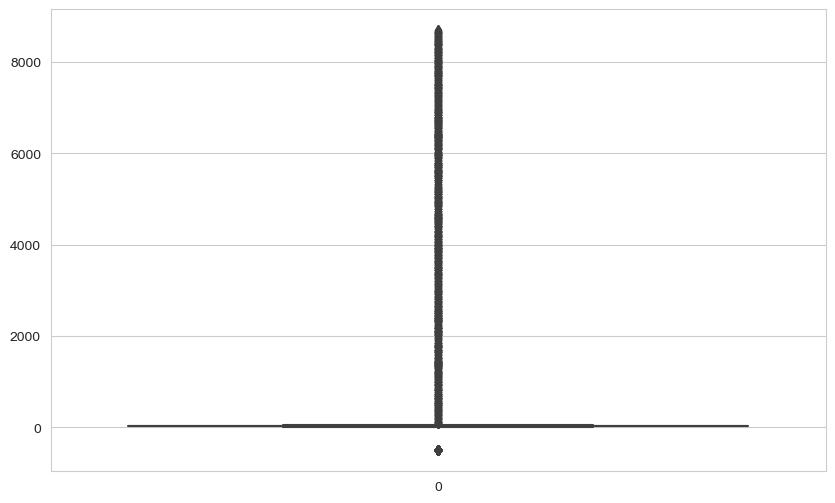

In [29]:
sns.boxplot(df.Age);

In [30]:
# Assuming df is your DataFrame
df.drop(df[(df['Age'] > 90) | (df['Age'] < 15)].index, inplace=True)

In [31]:
df.shape

(96044, 24)

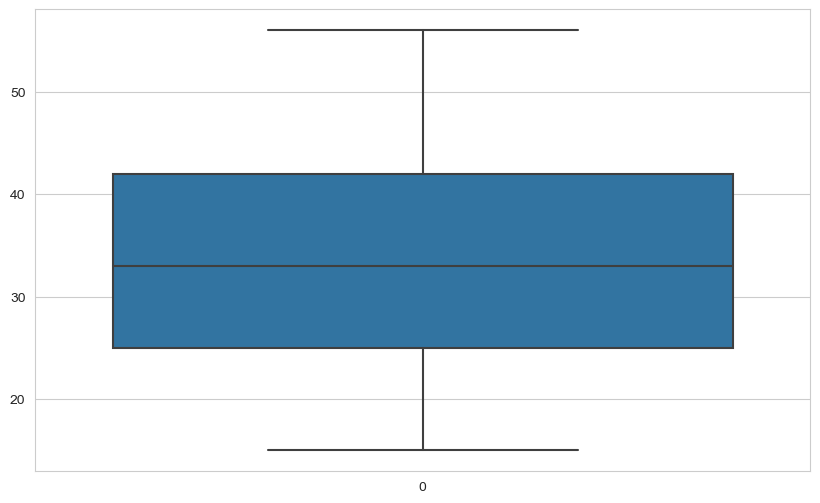

In [32]:
sns.boxplot(df.Age);

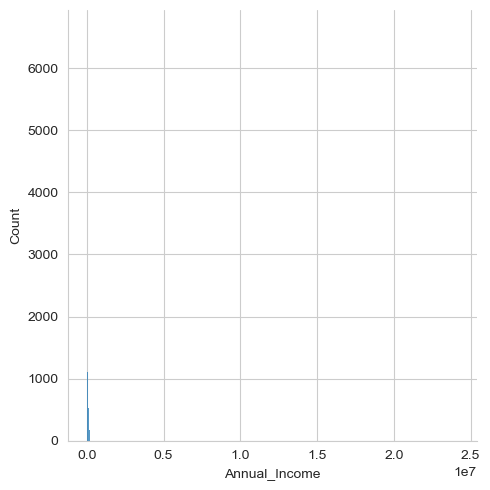

In [33]:
sns.displot(df.Annual_Income);

In [34]:
df.Annual_Income.max()

24198062.0

In [35]:
df.Annual_Income.min()

7005.93

In [36]:
get_iqr_lower_upper(df, 'Annual_Income', multiply=1.5)

Outliers: (2663, 24)


(-60826.009999999995, 153429.11)

In [37]:
df.drop(df[(df['Annual_Income'] < 0) | (df['Annual_Income'] > 1000000)].index, inplace=True)

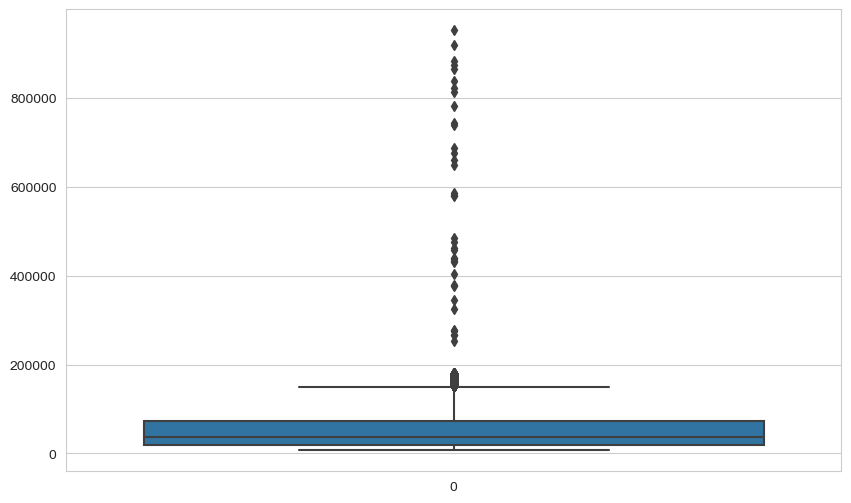

In [38]:
sns.boxplot(df.Annual_Income);

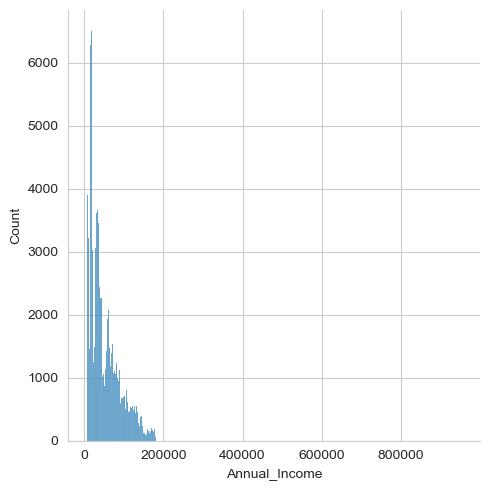

In [39]:
sns.displot(df.Annual_Income);

In [40]:
df.drop(df[(df['Annual_Income'] < 0) | (df['Annual_Income'] > 400000)].index, inplace=True)

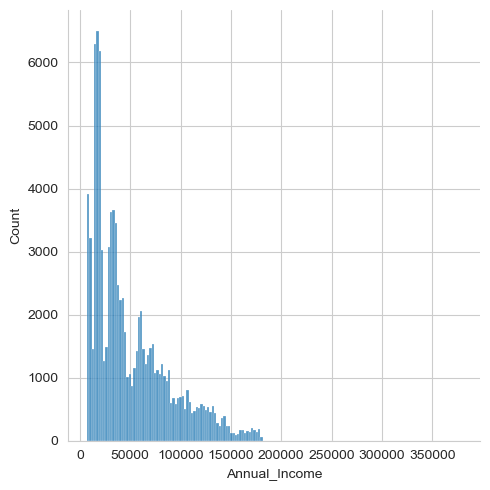

In [41]:
sns.displot(df.Annual_Income);

In [42]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                   6729
Annual_Income                   0
Monthly_Inhand_Salary       14262
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10943
Delay_from_due_date             0
Num_of_Delayed_Payment       6678
Changed_Credit_Limit         1990
Num_Credit_Inquiries         1869
Credit_Mix                  19217
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8596
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4254
Payment_Behaviour            7224
Monthly_Balance              1148
Credit_Score                    0
dtype: int64

In [43]:
df.shape

(95091, 24)

In [44]:
df.Occupation.unique()

array(['Scientist', nan, 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [45]:
# Assuming df is your DataFrame
df['Occupation'].fillna(value="other", inplace=True)

In [46]:
df.Occupation.unique()

array(['Scientist', 'other', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [47]:
df.Monthly_Inhand_Salary.max()

15204.633333333331

In [48]:
df.Monthly_Inhand_Salary.min()

303.6454166666666

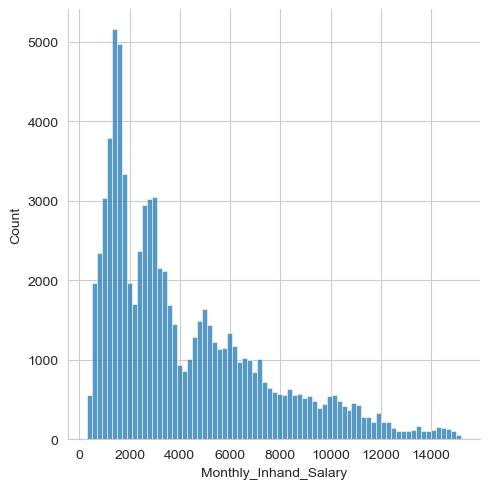

In [49]:
sns.displot(df.Monthly_Inhand_Salary);

In [50]:
# Assuming df is your DataFrame
df['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)

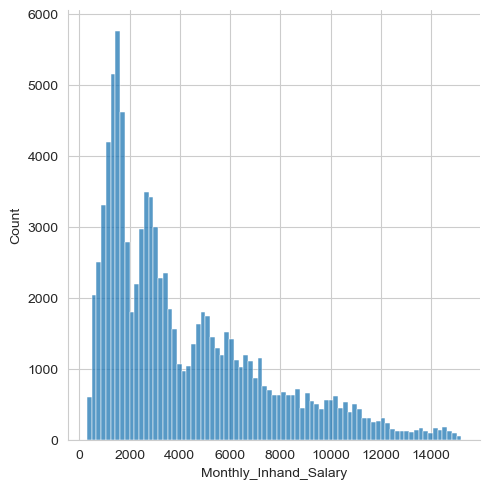

In [51]:
sns.displot(df.Monthly_Inhand_Salary);

In [52]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10943
Delay_from_due_date             0
Num_of_Delayed_Payment       6678
Changed_Credit_Limit         1990
Num_Credit_Inquiries         1869
Credit_Mix                  19217
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8596
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4254
Payment_Behaviour            7224
Monthly_Balance              1148
Credit_Score                    0
dtype: int64

In [53]:
df.Type_of_Loan.nunique()

6199

In [54]:
df['Type_of_Loan'].value_counts().head(10)

Not Specified                      1363
Credit-Builder Loan                1225
Personal Loan                      1220
Student Loan                       1203
Debt Consolidation Loan            1203
Payday Loan                        1149
Mortgage Loan                      1128
Auto Loan                          1097
Home Equity Loan                   1082
Personal Loan, and Student Loan     313
Name: Type_of_Loan, dtype: int64

In [55]:
## Rebuild Type of loans Columns 
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

In [56]:
df.head(2)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,23,Scientist,19114.120,1824.843,3,4,3,4,3,7.000,11.270,4.000,NaN,809.980,26.823,22 Years and 1 Months,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,True,True,False,False,False,False,True,True
1,2,23,Scientist,19114.120,1824.843,3,4,3,4,-1,NaN,11.270,4.000,Good,809.980,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,True,True,False,False,False,False,True,True


In [57]:
# Assuming df is your DataFrame and boolean_columns is a list containing the names of columns with boolean values
boolean_columns = ['Credit-Builder Loan', 'Personal Loan', 'Student Loan', 'Debt Consolidation Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
df[boolean_columns] = df[boolean_columns].astype(float)

In [58]:
df[boolean_columns].nunique()

Credit-Builder Loan        2
Personal Loan              2
Student Loan               2
Debt Consolidation Loan    2
Payday Loan                2
Mortgage Loan              2
Auto Loan                  2
Home Equity Loan           2
dtype: int64

In [59]:
df.head(50)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,23,Scientist,19114.120,1824.843,3,4,3,4,3,7.000,11.270,4.000,NaN,809.980,26.823,22 Years and 1 Months,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
1,2,23,Scientist,19114.120,1824.843,3,4,3,4,-1,NaN,11.270,4.000,Good,809.980,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
3,4,23,Scientist,19114.120,1824.843,3,4,3,4,5,4.000,6.270,4.000,Good,809.980,31.378,22 Years and 4 Months,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
4,5,23,Scientist,19114.120,1824.843,3,4,3,4,6,NaN,11.270,4.000,Good,809.980,24.797,22 Years and 5 Months,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
5,6,23,Scientist,19114.120,1824.843,3,4,3,4,8,4.000,9.270,4.000,Good,809.980,27.262,22 Years and 6 Months,No,49.575,62.430,NaN,340.479,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
6,7,23,Scientist,19114.120,1824.843,3,4,3,4,3,8.000,11.270,4.000,Good,809.980,22.538,22 Years and 7 Months,No,49.575,178.344,Low_spent_Small_value_payments,244.565,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
7,8,23,Scientist,19114.120,1824.843,3,4,3,4,3,6.000,11.270,4.000,Good,809.980,23.934,NaN,No,49.575,24.785,High_spent_Medium_value_payments,358.124,Standard,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
8,1,28,other,34847.840,3037.987,2,4,6,1,3,4.000,5.420,2.000,Good,605.030,24.464,26 Years and 7 Months,No,18.816,104.292,Low_spent_Small_value_payments,470.691,Standard,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,2,28,Teacher,34847.840,3037.987,2,4,6,1,7,1.000,7.420,2.000,Good,605.030,38.551,26 Years and 8 Months,No,18.816,40.391,High_spent_Large_value_payments,484.591,Good,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10,3,28,Teacher,34847.840,3037.987,2,1385,6,1,3,-1.000,5.420,2.000,NaN,605.030,33.225,26 Years and 9 Months,No,18.816,58.516,High_spent_Large_value_payments,466.466,Standard,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [60]:
# Fill NaN values in boolean columns with the previous value
df[boolean_columns] = df[boolean_columns].fillna(method='bfill')

In [61]:
df.Num_of_Delayed_Payment.value_counts().head(20)

19.000    5186
17.000    5174
10.000    5044
16.000    5023
15.000    4934
18.000    4911
12.000    4860
20.000    4824
9.000     4743
8.000     4667
11.000    4556
14.000    3990
13.000    3860
21.000    2416
7.000     2293
6.000     2219
22.000    2206
5.000     2014
23.000    1897
3.000     1853
Name: Num_of_Delayed_Payment, dtype: int64

In [62]:
df.Num_of_Delayed_Payment.isnull().sum()

6678

In [63]:
df['Num_of_Delayed_Payment'] = df["Num_of_Delayed_Payment"].fillna(method='ffill')

In [64]:
df.Num_of_Delayed_Payment.value_counts().head(20)

19.000    5569
17.000    5520
10.000    5430
16.000    5406
15.000    5327
18.000    5300
12.000    5243
20.000    5201
9.000     5074
8.000     4997
11.000    4896
14.000    4291
13.000    4165
21.000    2601
7.000     2470
6.000     2398
22.000    2363
5.000     2165
23.000    2048
3.000     1992
Name: Num_of_Delayed_Payment, dtype: int64

In [65]:
df.select_dtypes('number').head(2).isnull().sum()

Month                       0
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit-Builder Loan         0
Personal Loan               0
Student Loan                0
Debt Consolidation Loan     0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

In [66]:
df.select_dtypes('object').isnull().sum()

Occupation                   0
Credit_Mix               19217
Credit_History_Age        8596
Payment_of_Min_Amount        0
Payment_Behaviour         7224
Credit_Score                 0
dtype: int64

In [67]:
df.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      24207
High_spent_Medium_value_payments    16674
Low_spent_Medium_value_payments     13203
High_spent_Large_value_payments     13074
High_spent_Small_value_payments     10799
Low_spent_Large_value_payments       9910
Name: Payment_Behaviour, dtype: int64

In [68]:
df['Payment_Behaviour'] = df["Payment_Behaviour"].fillna(method='ffill')

In [69]:
df.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      26188
High_spent_Medium_value_payments    18095
Low_spent_Medium_value_payments     14247
High_spent_Large_value_payments     14143
High_spent_Small_value_payments     11684
Low_spent_Large_value_payments      10734
Name: Payment_Behaviour, dtype: int64

In [70]:
df['Credit_History_Age'] = df["Credit_History_Age"].fillna(method='ffill')

In [71]:
df.select_dtypes('object').isnull().sum()

Occupation                   0
Credit_Mix               19217
Credit_History_Age           0
Payment_of_Min_Amount        0
Payment_Behaviour            0
Credit_Score                 0
dtype: int64

In [72]:
df.Credit_Mix.value_counts()

Standard    34656
Good        23367
Bad         17851
Name: Credit_Mix, dtype: int64

In [73]:
df['Credit_Mix'] = df["Credit_Mix"].fillna(method='ffill')

In [74]:
df['Credit_Mix'] = df["Credit_Mix"].fillna(method='bfill')

In [75]:
df.select_dtypes('object').isnull().sum()

Occupation               0
Credit_Mix               0
Credit_History_Age       0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

In [76]:
df['Amount_invested_monthly'] = df["Amount_invested_monthly"].fillna(method='bfill')

In [77]:
df.isnull().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit        1990
Num_Credit_Inquiries        1869
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1148
Credit_Score                   0
Credit-Builder Loan            0
Personal Loan                  0
Student Loan                   0
Debt Consolidation Loan        0
Payday Loan                    0
Mortgage Loan                  0
Auto Loan                      0
Home Equit

In [78]:
df.dropna(inplace=True)

In [79]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit-Builder Loan         0
Personal Loan               0
Student Loan                0
Debt Consolidation Loan     0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

In [80]:
df.shape

(90169, 31)

In [81]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,23,Scientist,19114.120,1824.843,3,4,3,4,3,7.000,11.270,4.000,Good,809.980,26.823,22 Years and 1 Months,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
1,2,23,Scientist,19114.120,1824.843,3,4,3,4,-1,7.000,11.270,4.000,Good,809.980,31.945,22 Years and 1 Months,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
3,4,23,Scientist,19114.120,1824.843,3,4,3,4,5,4.000,6.270,4.000,Good,809.980,31.378,22 Years and 4 Months,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
4,5,23,Scientist,19114.120,1824.843,3,4,3,4,6,4.000,11.270,4.000,Good,809.980,24.797,22 Years and 5 Months,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
5,6,23,Scientist,19114.120,1824.843,3,4,3,4,8,4.000,9.270,4.000,Good,809.980,27.262,22 Years and 6 Months,No,49.575,62.430,High_spent_Medium_value_payments,340.479,Good,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000


In [82]:
df.select_dtypes('object').head(3)

,Occupation,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Good,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,Scientist,Good,22 Years and 1 Months,No,Low_spent_Large_value_payments,Good
3,Scientist,Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good


In [83]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

df['Credit_Score'] = df['Credit_Score'].map(m)

In [84]:
n = {
    "Bad":0,
    "Standard":1,
    "Good":2
}

df['Credit_Mix'] = df['Credit_Mix'].map(n)

In [85]:
df.head(2)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,23,Scientist,19114.120,1824.843,3,4,3,4,3,7.000,11.270,4.000,2,809.980,26.823,22 Years and 1 Months,No,49.575,80.415,High_spent_Small_value_payments,312.494,2,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
1,2,23,Scientist,19114.120,1824.843,3,4,3,4,-1,7.000,11.270,4.000,2,809.980,31.945,22 Years and 1 Months,No,49.575,118.280,Low_spent_Large_value_payments,284.629,2,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000


In [86]:
import re
def History_age(age):
    try:
        # Extract years and months using regular expressions
        years_match = re.search(r'(\d+)\s*Years?', age)
        months_match = re.search(r'(\d+)\s*Months?', age)

        # Extract years and months from matches
        years = int(years_match.group(1)) if years_match else 0
        months = int(months_match.group(1)) if months_match else 0

        # Calculate total months
        total_months = years * 12 + months
        return total_months
    except:
        return None  # Return None if the conversion fails

In [87]:
# Apply the function to the 'History_age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

In [88]:
df.Payment_of_Min_Amount.value_counts()

Yes    46766
No     32567
NM     10836
Name: Payment_of_Min_Amount, dtype: int64

In [89]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [90]:
p = {
    "Yes":1,
    "No":0
}

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(p)

In [91]:
df.Credit_History_Age.value_counts()

189    451
215    442
232    438
233    437
191    434
      ... 
3       20
403     18
404     15
2       14
1        1
Name: Credit_History_Age, Length: 404, dtype: int64

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,90169.000,4.509,2.293,1.000,3.000,5.000,7.000,8.000
Age,90169.000,33.563,10.617,15.000,25.000,33.000,42.000,56.000
Annual_Income,90169.000,50146.796,38195.378,7005.930,19283.470,36760.860,71223.920,378844.000
Monthly_Inhand_Salary,90169.000,4164.515,3171.655,303.645,1621.009,3061.552,5914.947,15204.633
Num_Bank_Accounts,90169.000,17.280,118.835,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,90169.000,22.380,128.508,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,90169.000,72.472,467.978,1.000,8.000,13.000,20.000,5797.000
Num_of_Loan,90169.000,2.871,61.777,-100.000,1.000,3.000,5.000,1495.000
Delay_from_due_date,90169.000,20.976,14.829,-5.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,90169.000,30.840,225.617,-3.000,9.000,14.000,18.000,4397.000


In [93]:
df.Monthly_Balance.value_counts()

-333333333333333314856026112.000    9
486.017                             1
366.401                             1
510.221                             1
504.797                             1
                                   ..
781.638                             1
273.629                             1
728.487                             1
331.509                             1
393.674                             1
Name: Monthly_Balance, Length: 90161, dtype: int64

In [94]:
df.Monthly_Balance.max()

1602.0405189622518

In [95]:
df.Monthly_Balance.min()

-3.333333333333333e+26

In [96]:
df.Monthly_Balance.nunique()

90161

In [97]:
df.shape

(90169, 31)

In [98]:
# Assuming df is your DataFrame
df= df.drop(df[df['Monthly_Balance'] < 0].index)


In [99]:
df.Num_Bank_Accounts.value_counts()

6       11660
7       11512
8       11450
4       11053
5       10961
        ...  
1470        1
211         1
1221        1
753         1
697         1
Name: Num_Bank_Accounts, Length: 871, dtype: int64

In [100]:
# Calculate the mean value for replacement
replacement_value = 6

# Replace values greater than 10 with the mean value
df.loc[(df['Num_Bank_Accounts'] > 10) | (df['Num_Bank_Accounts'] < 0), 'Num_Bank_Accounts'] = replacement_value

# Alternatively, if you want to replace NaN values as well, you can use the following line:
# df['Num_Bank_Accounts'] = np.where(df['Num_Bank_Accounts'] > 10, replacement_value, df['Num_Bank_Accounts'])


In [101]:
# Calculate the mean value for replacement
replacement_value = 5

# Replace values greater than 10 with the mean value
df.loc[(df['Num_Credit_Card'] > 20) | (df['Num_Credit_Card'] < 0), 'Num_Credit_Card'] = replacement_value

# Alternatively, if you want to replace NaN values as well, you can use the following line:
# df['Num_Bank_Accounts'] = np.where(df['Num_Bank_Accounts'] > 10, replacement_value, df['Num_Bank_Accounts'])


In [102]:
# List of features to modify
features_to_modify = ['Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit']

# Apply abs() function to change negative values to positive for each feature
for feature in features_to_modify:
    df[feature] = df[feature].abs()

In [103]:
df.Payment_Behaviour.value_counts()

Low_spent_Small_value_payments      24301
High_spent_Medium_value_payments    17325
High_spent_Large_value_payments     13587
Low_spent_Medium_value_payments     13489
High_spent_Small_value_payments     11210
Low_spent_Large_value_payments      10248
Name: Payment_Behaviour, dtype: int64

In [104]:
t = {"Low_spent_Small_value_payments":1, 
    "Low_spent_Medium_value_payments":2,
    "Low_spent_Large_value_payments":3,
    "High_spent_Small_value_payments":4,
    "High_spent_Medium_value_payments":5,
    "High_spent_Large_value_payments":6
}

df['Payment_Behaviour'] = df['Payment_Behaviour'].map(t)

In [105]:
df.corr()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
Month,1.000,0.010,-0.001,-0.003,0.001,0.002,0.000,0.000,0.003,-0.001,-0.000,0.004,0.000,0.002,0.004,0.019,0.002,0.003,-0.001,-0.008,-0.005,0.012,-0.000,0.001,0.001,0.000,0.001,-0.001,0.002,0.002
Age,0.010,1.000,0.087,0.083,-0.180,-0.140,-0.002,-0.006,-0.167,-0.000,-0.152,-0.005,0.225,-0.195,0.022,0.223,-0.220,-0.000,0.005,0.030,0.110,0.151,-0.056,-0.067,-0.043,-0.058,-0.049,-0.055,-0.054,-0.049
Annual_Income,-0.001,0.087,1.000,0.972,-0.279,-0.212,-0.005,-0.011,-0.248,-0.000,-0.176,-0.009,0.329,-0.269,0.185,0.269,-0.266,0.009,0.052,0.319,0.704,0.207,-0.089,-0.070,-0.067,-0.077,-0.071,-0.069,-0.068,-0.072
Monthly_Inhand_Salary,-0.003,0.083,0.972,1.000,-0.271,-0.206,-0.007,-0.012,-0.242,-0.001,-0.172,-0.009,0.323,-0.263,0.181,0.262,-0.258,0.009,0.051,0.314,0.689,0.198,-0.085,-0.068,-0.065,-0.077,-0.069,-0.067,-0.066,-0.072
Num_Bank_Accounts,0.001,-0.180,-0.279,-0.271,1.000,0.432,0.010,0.014,0.556,0.011,0.331,0.010,-0.692,0.500,-0.069,-0.472,0.500,-0.006,-0.017,-0.088,-0.291,-0.382,0.144,0.146,0.104,0.118,0.138,0.148,0.133,0.134
Num_Credit_Card,0.002,-0.140,-0.212,-0.206,0.432,1.000,0.008,0.017,0.471,0.009,0.253,0.007,-0.518,0.482,-0.052,-0.403,0.354,-0.005,-0.006,-0.067,-0.231,-0.395,0.131,0.119,0.110,0.111,0.124,0.124,0.120,0.113
Interest_Rate,0.000,-0.002,-0.005,-0.007,0.010,0.008,1.000,-0.000,0.011,0.002,0.002,-0.001,-0.010,0.010,-0.000,-0.009,0.008,0.002,0.000,0.001,-0.007,-0.002,0.004,0.000,0.000,-0.001,0.000,-0.004,0.002,0.005
Num_of_Loan,0.000,-0.006,-0.011,-0.012,0.014,0.017,-0.000,1.000,0.012,0.009,0.013,-0.002,-0.019,0.022,-0.006,-0.019,0.013,0.000,0.001,0.004,-0.017,-0.006,0.011,0.009,0.012,0.005,0.011,0.012,0.009,0.009
Delay_from_due_date,0.003,-0.167,-0.248,-0.242,0.556,0.471,0.011,0.012,1.000,0.012,0.295,0.011,-0.665,0.572,-0.061,-0.485,0.440,-0.004,-0.010,-0.080,-0.278,-0.429,0.141,0.152,0.138,0.145,0.146,0.149,0.143,0.148
Num_of_Delayed_Payment,-0.001,-0.000,-0.000,-0.001,0.011,0.009,0.002,0.009,0.012,1.000,0.009,0.001,-0.013,0.010,0.001,-0.008,0.014,0.000,0.001,0.003,-0.004,-0.007,0.009,0.001,0.002,0.003,0.006,0.003,-0.001,0.002


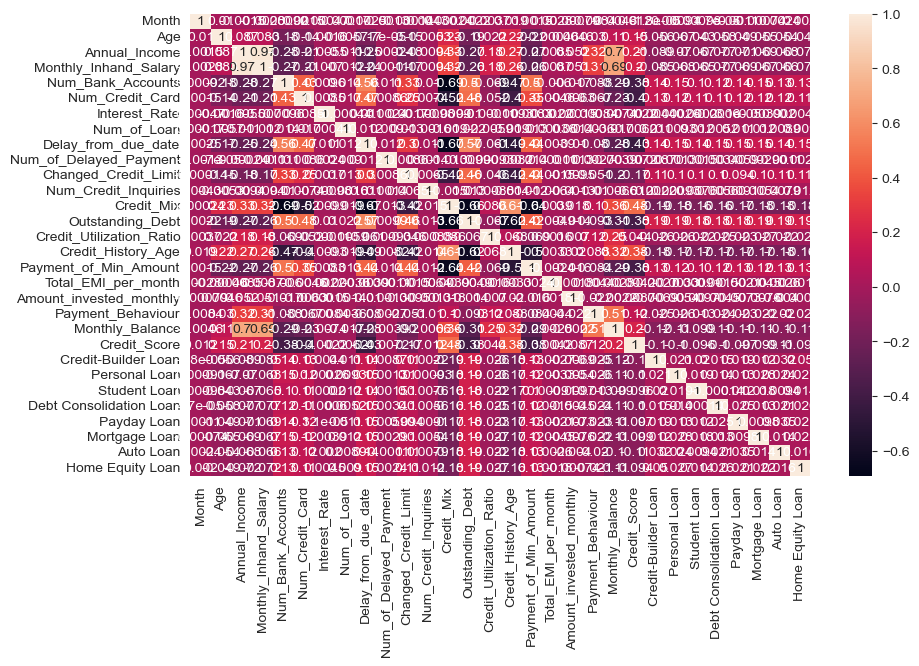

In [106]:
sns.heatmap(df.corr(), annot=True);

In [107]:
Numericals = ['Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries','Outstanding_Debt', 
'Total_EMI_per_month', 'Amount_invested_monthly']

In [108]:
def detect_outliers(df, threshold=3):
    outliers_indices = []
    for col in df.columns:
        if df[col].dtype != 'object':  # Exclude non-numeric columns
            z_scores = (df[col] - df[col].mean()) / df[col].std()
            outliers_indices.extend(z_scores[abs(z_scores) > threshold].index)
    return list(set(outliers_indices))

# Assuming 'Numericals' is a list containing the names of numerical columns in your DataFrame
Numericals = ['Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries','Outstanding_Debt', 
'Total_EMI_per_month', 'Amount_invested_monthly']

for col in Numericals:
    outliers_indices = detect_outliers(df[[col]])
    median = df[col].median()
    df.loc[outliers_indices, col] = median


In [109]:

# Applying one-hot encoding using pd.get_dummies()
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,90160.000,4.509,2.293,1.000,3.000,5.000,7.000,8.000
Age,90160.000,33.563,10.616,15.000,25.000,33.000,42.000,56.000
Annual_Income,90160.000,50146.489,38195.719,7005.930,19280.890,36760.860,71223.920,378844.000
Monthly_Inhand_Salary,90160.000,4164.482,3171.682,303.645,1621.009,3061.552,5914.947,15204.633
Num_Bank_Accounts,90160.000,5.358,2.575,0.000,3.000,6.000,7.000,10.000
Num_Credit_Card,90160.000,5.508,2.043,0.000,4.000,5.000,7.000,20.000
Interest_Rate,90160.000,18.433,62.890,1.000,8.000,13.000,20.000,1475.000
Num_of_Loan,90160.000,7.302,18.980,0.000,2.000,3.000,6.000,193.000
Delay_from_due_date,90160.000,21.004,14.791,0.000,10.000,18.000,28.000,67.000
Num_of_Delayed_Payment,90160.000,13.687,14.729,0.000,9.000,14.000,18.000,707.000


In [111]:
df.to_csv('train_eda.csv', index=False)

# Train - Test Split

In [2]:
df = pd.read_csv('train_eda.csv')

In [3]:
X = df .drop("Credit_Score", axis = 1)
y = df["Credit_Score"]

In [73]:
X.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit-Builder Loan,Personal Loan,Student Loan,Debt Consolidation Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation_other
0,1,23,19114.120,1824.843,3,4,3,4,3,7.000,11.270,4.000,2,809.980,26.823,265,0,49.575,80.415,4,312.494,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,23,19114.120,1824.843,3,4,3,4,1,7.000,11.270,4.000,2,809.980,31.945,265,0,49.575,118.280,3,284.629,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,4,23,19114.120,1824.843,3,4,3,4,5,4.000,6.270,4.000,2,809.980,31.378,268,0,49.575,199.458,1,223.451,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,5,23,19114.120,1824.843,3,4,3,4,6,4.000,11.270,4.000,2,809.980,24.797,269,0,49.575,41.420,5,341.489,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6,23,19114.120,1824.843,3,4,3,4,8,4.000,9.270,4.000,2,809.980,27.262,270,0,49.575,62.430,5,340.479,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
y.value_counts(normalize=True)

1   0.532
0   0.288
2   0.180
Name: Credit_Score, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

## ANN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense,  Activation, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

from keras.layers import BatchNormalization

In [1005]:
model = Sequential()

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=100,  callbacks=[early_stop])

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4918 - loss: 1.0850 - val_accuracy: 0.5822 - val_loss: 0.8408
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - loss: 0.7684 - val_accuracy: 0.6299 - val_loss: 0.7461
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6671 - loss: 0.7259 - val_accuracy: 0.6729 - val_loss: 0.7060
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.7060 - val_accuracy: 0.6861 - val_loss: 0.6937
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.6975 - val_accuracy: 0.6909 - val_loss: 0.6863
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6867 - loss: 0.6857 - val_accuracy: 0.6930 - val_loss: 0.6782
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6942 - loss: 0.6768 - val_accuracy: 0.6962 - val_loss: 0.6714
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.6701 - val_accu

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.5046 - val_accuracy: 0.7562 - val_loss: 0.5650
Epoch 52/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.5012 - val_accuracy: 0.7581 - val_loss: 0.5685
Epoch 53/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7848 - loss: 0.4943 - val_accuracy: 0.7570 - val_loss: 0.5653
Epoch 54/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4943 - val_accuracy: 0.7562 - val_loss: 0.5643
Epoch 55/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4931 - val_accuracy: 0.7557 - val_loss: 0.5635
Epoch 56/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.4892 - val_accuracy: 0.7541 - val_loss: 0.5684
Epoch 57/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4923 - val_accuracy: 0.7573 - val_loss: 0.5678
Epoch 58/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4901 - val_accuracy:

In [1006]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,939 (394.30 KB)

 Trainable params: 33,411 (130.51 KB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 66,824 (261.04 KB)

In [1007]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [1008]:
eval_metric(model, X_train, y_train, X_test, y_test)

2536/2536 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step
Test Set:
[[1980  568   31]
 [ 619 3764  408]
 [  20  412 1214]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2579
           1       0.79      0.79      0.79      4791
           2       0.73      0.74      0.74      1646

    accuracy                           0.77      9016
   macro avg       0.76      0.76      0.76      9016
weighted avg       0.77      0.77      0.77      9016


Train Set:
[[20476  2818    72]
 [ 4077 36336  2805]
 [   33  2186 12341]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     23366
           1       0.88      0.84      0.86     43218
           2       0.81      0.85      0.83     14560

    accuracy                           0.85     81144
   macro avg       0.84      0.85      0.85     81144
weighted avg       0.85      0.85      0.85     81144



In [ ]:
model = Sequential()

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)


In [6]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}
class_weights

{0: 1.157579388855602, 1: 0.6258503401360545, 2: 1.8576923076923078}

In [1016]:
 model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          batch_size=512,
          epochs=100,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4472 - val_accuracy: 0.7740 - val_loss: 0.5393
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.4466 - val_accuracy: 0.7720 - val_loss: 0.5451
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.4485 - val_accuracy: 0.7689 - val_loss: 0.5491
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.4484 - val_accuracy: 0.7741 - val_loss: 0.5427
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4435 - val_accuracy: 0.7725 - val_loss: 0.5396
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.4439 - val_accuracy: 0.7737 - val_loss: 0.5473
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4453 - val_accuracy: 0.7723 - val_loss: 0.5444
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8103 - loss: 0.4424 - val_accu

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.4221 - val_accuracy: 0.7806 - val_loss: 0.5358
Epoch 52/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.4230 - val_accuracy: 0.7771 - val_loss: 0.5395
Epoch 53/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8191 - loss: 0.4198 - val_accuracy: 0.7857 - val_loss: 0.5277
Epoch 54/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.4288 - val_accuracy: 0.7824 - val_loss: 0.5254
Epoch 55/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8190 - loss: 0.4242 - val_accuracy: 0.7866 - val_loss: 0.5307
Epoch 56/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8198 - loss: 0.4217 - val_accuracy: 0.7816 - val_loss: 0.5374
Epoch 57/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8181 - loss: 0.4236 - val_accuracy: 0.7852 - val_loss: 0.5304
Epoch 58/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.4237 - val_accuracy:

In [1017]:
eval_metric(model, X_train, y_train, X_test, y_test)

2536/2536 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
Test Set:
[[2129  410   40]
 [ 689 3612  490]
 [  27  297 1322]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2579
           1       0.84      0.75      0.79      4791
           2       0.71      0.80      0.76      1646

    accuracy                           0.78      9016
   macro avg       0.77      0.79      0.78      9016
weighted avg       0.79      0.78      0.78      9016


Train Set:
[[21526  1760    80]
 [ 4449 35450  3319]
 [   19  1317 13224]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     23366
           1       0.92      0.82      0.87     43218
           2       0.80      0.91      0.85     14560

    accuracy                           0.87     81144
   macro avg       0.85      0.88      0.86     81144
weighted avg       0.87      0.87      0.87     81144



In [1019]:
model = Sequential()

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)

history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=512, epochs=200,
                    verbose=1,
          callbacks=[early_stop])

Epoch 1/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5026 - loss: 1.1010 - val_accuracy: 0.6005 - val_loss: 0.8629
Epoch 2/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 0.7798 - val_accuracy: 0.6374 - val_loss: 0.7474
Epoch 3/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.7431 - val_accuracy: 0.6798 - val_loss: 0.7090
Epoch 4/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.7178 - val_accuracy: 0.6786 - val_loss: 0.7040
Epoch 5/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 0.7103 - val_accuracy: 0.6960 - val_loss: 0.6887
Epoch 6/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6779 - loss: 0.6960 - val_accuracy: 0.6909 - val_loss: 0.6822
Epoch 7/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6831 - loss: 0.6884 - val_accuracy: 0.6973 - val_loss: 0.6751
Epoch 8/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6878 - loss: 0.6830 - val_accu

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7568 - loss: 0.5440 - val_accuracy: 0.7547 - val_loss: 0.5651
Epoch 52/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7579 - loss: 0.5431 - val_accuracy: 0.7587 - val_loss: 0.5632
Epoch 53/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.5389 - val_accuracy: 0.7578 - val_loss: 0.5554
Epoch 54/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7618 - loss: 0.5338 - val_accuracy: 0.7567 - val_loss: 0.5607
Epoch 55/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7637 - loss: 0.5328 - val_accuracy: 0.7609 - val_loss: 0.5558
Epoch 56/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.5346 - val_accuracy: 0.7631 - val_loss: 0.5558
Epoch 57/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7623 - loss: 0.5322 - val_accuracy: 0.7561 - val_loss: 0.5628
Epoch 58/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7630 - loss: 0.5330 - val_accuracy:

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7816 - loss: 0.4943 - val_accuracy: 0.7808 - val_loss: 0.5248
Epoch 102/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.4963 - val_accuracy: 0.7803 - val_loss: 0.5223
Epoch 103/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7826 - loss: 0.4912 - val_accuracy: 0.7789 - val_loss: 0.5205
Epoch 104/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4933 - val_accuracy: 0.7824 - val_loss: 0.5169
Epoch 105/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 0.4980 - val_accuracy: 0.7835 - val_loss: 0.5199
Epoch 106/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7836 - loss: 0.4908 - val_accuracy: 0.7819 - val_loss: 0.5194
Epoch 107/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7859 - loss: 0.4887 - val_accuracy: 0.7853 - val_loss: 0.5178
Epoch 108/200
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.4917 - val_ac

In [1020]:
eval_metric(model, X_train, y_train, X_test, y_test)

2536/2536 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step
Test Set:
[[2134  414   31]
 [ 660 3682  449]
 [  18  327 1301]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2579
           1       0.83      0.77      0.80      4791
           2       0.73      0.79      0.76      1646

    accuracy                           0.79      9016
   macro avg       0.77      0.80      0.78      9016
weighted avg       0.79      0.79      0.79      9016


Train Set:
[[21271  2024    71]
 [ 4667 35228  3323]
 [   27  1393 13140]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     23366
           1       0.91      0.82      0.86     43218
           2       0.79      0.90      0.85     14560

    accuracy                           0.86     81144
   macro avg       0.84      0.88      0.86     81144
weighted avg       0.86      0.86      0.86     81144



In [1024]:
np.unique(y_test)

array([0, 1, 2])

In [1025]:
np.unique(y_train)

array([0, 1, 2])

In [1026]:
print(class_weights)


{0: 1.157579388855602, 1: 0.6258503401360545, 2: 1.8576923076923078}


In [13]:
X1, y1 = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

In [14]:
y1.value_counts(normalize=True)

1   0.532
0   0.288
2   0.180
Name: Credit_Score, dtype: float64

# SMOTE


By using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the imbalanced-learn library to perform oversampling on your dataset.

Here's what each line of the code does:

Import the SMOTE class from the imblearn.over_sampling module.
Initialize the SMOTE object with sampling_strategy='auto'. The sampling_strategy parameter determines how the minority class(es) will be resampled. Setting it to 'auto' means that the minority class(es) will be oversampled to match the majority class(es) (if there is more than one class).
Apply the fit_resample() method of the SMOTE object to resample the input features X1 and target labels y1. This method returns the resampled versions of X1 and y1, denoted as X1_s and y1_s, respectively.
After running this code, X1_s and y1_s will contain the resampled versions of your input features and target labels, where the minority class(es) have been oversampled to address class imbalance.

In [15]:
from imblearn.over_sampling import SMOTE
s = SMOTE(sampling_strategy='auto')
X1_s, y1_s = s.fit_resample(X1, y1)

In [16]:
y1_s.value_counts(normalize=True)

2   0.333
1   0.333
0   0.333
Name: Credit_Score, dtype: float64

In [43]:
# split into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_s, y1_s, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y1_s)

In [1037]:
scalar = MinMaxScaler().fit(X1_train)

In [1038]:
X1_train = scalar.transform(X1_train)
X1_test = scalar.transform(X1_test)

In [1039]:
model = Sequential()

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)

history = model.fit(x=X1_train, y=y1_train, 
                    validation_data=(X1_test, y1_test),
                    batch_size=512, epochs=200,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5740 - loss: 1.0049 - val_accuracy: 0.5905 - val_loss: 0.8695
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6898 - loss: 0.7425 - val_accuracy: 0.6888 - val_loss: 0.7348
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7055 - loss: 0.7055 - val_accuracy: 0.7200 - val_loss: 0.6752
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7126 - loss: 0.6834 - val_accuracy: 0.7314 - val_loss: 0.6466
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7199 - loss: 0.6654 - val_accuracy: 0.7381 - val_loss: 0.6314
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7270 - loss: 0.6515 - val_accuracy: 0.7337 - val_loss: 0.6317
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7334 - loss: 0.6355 - val_accuracy: 0.7454 - val_loss: 0.6099
Epoch 8/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7381 - loss: 0.6267 - val_accu

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.4548 - val_accuracy: 0.8228 - val_loss: 0.4388
Epoch 52/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8102 - loss: 0.4591 - val_accuracy: 0.8251 - val_loss: 0.4305
Epoch 53/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.4556 - val_accuracy: 0.8258 - val_loss: 0.4331
Epoch 54/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8173 - loss: 0.4479 - val_accuracy: 0.8240 - val_loss: 0.4348
Epoch 55/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8162 - loss: 0.4485 - val_accuracy: 0.8265 - val_loss: 0.4291
Epoch 56/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.4493 - val_accuracy: 0.8270 - val_loss: 0.4285
Epoch 57/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8136 - loss: 0.4534 - val_accuracy: 0.8274 - val_loss: 0.4291
Epoch 58/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.4475 - val_accuracy:

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8324 - loss: 0.4143 - val_accuracy: 0.8443 - val_loss: 0.3967
Epoch 102/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.4094 - val_accuracy: 0.8456 - val_loss: 0.3941
Epoch 103/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.4129 - val_accuracy: 0.8421 - val_loss: 0.4001
Epoch 104/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0.4116 - val_accuracy: 0.8437 - val_loss: 0.4006
Epoch 105/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8335 - loss: 0.4108 - val_accuracy: 0.8463 - val_loss: 0.3937
Epoch 106/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8348 - loss: 0.4081 - val_accuracy: 0.8460 - val_loss: 0.3963
Epoch 107/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.4053 - val_accuracy: 0.8429 - val_loss: 0.3983
Epoch 108/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8319 - loss: 0.4129 - val_ac

In [1040]:
eval_metric(model, X1_train, y1_train, X1_test, y1_test)

3151/3151 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step
Test Set:
[[13015  1054   334]
 [ 2241 10266  1896]
 [   53   599 13751]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     14403
           1       0.86      0.71      0.78     14403
           2       0.86      0.95      0.91     14403

    accuracy                           0.86     43209
   macro avg       0.86      0.86      0.85     43209
weighted avg       0.86      0.86      0.85     43209


Train Set:
[[31937  1414   255]
 [ 4227 26182  3197]
 [   33   535 33038]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     33606
           1       0.93      0.78      0.85     33606
           2       0.91      0.98      0.94     33606

    accuracy                           0.90    100818
   macro avg       0.91      0.90      0.90    100818
weighted avg       0.91      0.90      0.90    100818

In [1041]:
model = Sequential()

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)

history = model.fit(x=X1_train, y=y1_train, 
                    validation_data=(X1_test, y1_test),
                    batch_size=512, epochs=300,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5638 - loss: 1.0157 - val_accuracy: 0.6757 - val_loss: 0.8056
Epoch 2/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6912 - loss: 0.7549 - val_accuracy: 0.6945 - val_loss: 0.7384
Epoch 3/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7024 - loss: 0.7191 - val_accuracy: 0.7169 - val_loss: 0.6817
Epoch 4/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7104 - loss: 0.6976 - val_accuracy: 0.7277 - val_loss: 0.6591
Epoch 5/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7191 - loss: 0.6741 - val_accuracy: 0.7331 - val_loss: 0.6396
Epoch 6/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7243 - loss: 0.6624 - val_accuracy: 0.7346 - val_loss: 0.6335
Epoch 7/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7277 - loss: 0.6531 - val_accuracy: 0.7367 - val_loss: 0.6265
Epoch 8/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7289 - loss: 0.6448 - val_accu

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8072 - loss: 0.4642 - val_accuracy: 0.8261 - val_loss: 0.4340
Epoch 52/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8144 - loss: 0.4573 - val_accuracy: 0.8223 - val_loss: 0.4380
Epoch 53/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8120 - loss: 0.4555 - val_accuracy: 0.8256 - val_loss: 0.4340
Epoch 54/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8132 - loss: 0.4561 - val_accuracy: 0.8283 - val_loss: 0.4283
Epoch 55/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8124 - loss: 0.4564 - val_accuracy: 0.8245 - val_loss: 0.4351
Epoch 56/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 0.4506 - val_accuracy: 0.8267 - val_loss: 0.4313
Epoch 57/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8164 - loss: 0.4480 - val_accuracy: 0.8301 - val_loss: 0.4252
Epoch 58/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8167 - loss: 0.4497 - val_accuracy:

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8350 - loss: 0.4107 - val_accuracy: 0.8477 - val_loss: 0.3907
Epoch 102/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8317 - loss: 0.4139 - val_accuracy: 0.8504 - val_loss: 0.3864
Epoch 103/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8336 - loss: 0.4113 - val_accuracy: 0.8474 - val_loss: 0.3945
Epoch 104/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8335 - loss: 0.4115 - val_accuracy: 0.8490 - val_loss: 0.3900
Epoch 105/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8363 - loss: 0.4067 - val_accuracy: 0.8502 - val_loss: 0.3889
Epoch 106/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8361 - loss: 0.4061 - val_accuracy: 0.8500 - val_loss: 0.3929
Epoch 107/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8356 - loss: 0.4117 - val_accuracy: 0.8503 - val_loss: 0.3857
Epoch 108/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8355 - loss: 0.4112 - val_ac

In [1042]:
eval_metric(model, X1_train, y1_train, X1_test, y1_test)

3151/3151 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
Test Set:
[[13195   946   262]
 [ 2319 10430  1654]
 [   77   780 13546]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14403
           1       0.86      0.72      0.79     14403
           2       0.88      0.94      0.91     14403

    accuracy                           0.86     43209
   macro avg       0.86      0.86      0.86     43209
weighted avg       0.86      0.86      0.86     43209


Train Set:
[[32253  1149   204]
 [ 4333 26502  2771]
 [   43   918 32645]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     33606
           1       0.93      0.79      0.85     33606
           2       0.92      0.97      0.94     33606

    accuracy                           0.91    100818
   macro avg       0.91      0.91      0.90    100818
weighted avg       0.91      0.91      0.90    100818

In [3]:
from sklearn.preprocessing import StandardScaler

In [1044]:
scalar =StandardScaler().fit(X1_train)

In [1045]:
X2_train = scalar.transform(X1_train)
X2_test = scalar.transform(X1_test)

In [1046]:
model = Sequential()

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)

history = model.fit(x=X2_train, y=y1_train, 
                    validation_data=(X2_test, y1_test),
                    batch_size=512, epochs=300,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5698 - loss: 0.9974 - val_accuracy: 0.6962 - val_loss: 0.7311
Epoch 2/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6872 - loss: 0.7502 - val_accuracy: 0.7181 - val_loss: 0.6831
Epoch 3/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7051 - loss: 0.7091 - val_accuracy: 0.7266 - val_loss: 0.6613
Epoch 4/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7174 - loss: 0.6832 - val_accuracy: 0.7368 - val_loss: 0.6365
Epoch 5/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7234 - loss: 0.6616 - val_accuracy: 0.7425 - val_loss: 0.6221
Epoch 6/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7302 - loss: 0.6478 - val_accuracy: 0.7466 - val_loss: 0.6113
Epoch 7/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7340 - loss: 0.6351 - val_accuracy: 0.7504 - val_loss: 0.5992
Epoch 8/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7419 - loss: 0.6215 - val_accu

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8155 - loss: 0.4453 - val_accuracy: 0.8294 - val_loss: 0.4234
Epoch 52/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8190 - loss: 0.4385 - val_accuracy: 0.8312 - val_loss: 0.4192
Epoch 53/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8181 - loss: 0.4438 - val_accuracy: 0.8326 - val_loss: 0.4208
Epoch 54/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8157 - loss: 0.4444 - val_accuracy: 0.8315 - val_loss: 0.4219
Epoch 55/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8184 - loss: 0.4425 - val_accuracy: 0.8309 - val_loss: 0.4243
Epoch 56/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8211 - loss: 0.4379 - val_accuracy: 0.8338 - val_loss: 0.4181
Epoch 57/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8220 - loss: 0.4344 - val_accuracy: 0.8357 - val_loss: 0.4136
Epoch 58/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8231 - loss: 0.4328 - val_accuracy:

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8378 - loss: 0.4010 - val_accuracy: 0.8502 - val_loss: 0.3873
Epoch 102/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8400 - loss: 0.3985 - val_accuracy: 0.8506 - val_loss: 0.3851
Epoch 103/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8419 - loss: 0.3965 - val_accuracy: 0.8517 - val_loss: 0.3861
Epoch 104/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8410 - loss: 0.3940 - val_accuracy: 0.8524 - val_loss: 0.3848
Epoch 105/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8394 - loss: 0.3982 - val_accuracy: 0.8522 - val_loss: 0.3837
Epoch 106/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8418 - loss: 0.3952 - val_accuracy: 0.8530 - val_loss: 0.3813
Epoch 107/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8424 - loss: 0.3970 - val_accuracy: 0.8535 - val_loss: 0.3822
Epoch 108/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8410 - loss: 0.3949 - val_ac

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8560 - loss: 0.3648 - val_accuracy: 0.8626 - val_loss: 0.3627
Epoch 200/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3639 - val_accuracy: 0.8649 - val_loss: 0.3595
Epoch 201/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8540 - loss: 0.3698 - val_accuracy: 0.8644 - val_loss: 0.3597
Epoch 202/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8535 - loss: 0.3659 - val_accuracy: 0.8645 - val_loss: 0.3579
Epoch 203/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3638 - val_accuracy: 0.8652 - val_loss: 0.3580
Epoch 204/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8567 - loss: 0.3647 - val_accuracy: 0.8656 - val_loss: 0.3567
Epoch 205/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8553 - loss: 0.3663 - val_accuracy: 0.8668 - val_loss: 0.3562
Epoch 206/300
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8561 - loss: 0.3624 - val_ac

In [1047]:
eval_metric(model, X2_train, y1_train, X2_test, y1_test)

3151/3151 ━━━━━━━━━━━━━━━━━━━━ 1s 321us/step
1351/1351 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
Test Set:
[[13193   995   215]
 [ 2092 10692  1619]
 [   42   678 13683]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14403
           1       0.86      0.74      0.80     14403
           2       0.88      0.95      0.91     14403

    accuracy                           0.87     43209
   macro avg       0.87      0.87      0.87     43209
weighted avg       0.87      0.87      0.87     43209


Train Set:
[[32519   994    93]
 [ 3740 27419  2447]
 [   15   582 33009]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     33606
           1       0.95      0.82      0.88     33606
           2       0.93      0.98      0.95     33606

    accuracy                           0.92    100818
   macro avg       0.92      0.92      0.92    100818
weighted avg       0.92      0.92      0.92    100818

In [68]:
# Sadece Accuracy değişimine bakalım

print("\nAccuracy during Training :\n------------------------------------")

pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()


Accuracy during Training :
------------------------------------


KeyError: 'accuracy'

## XGBOOST

In [1062]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [1063]:
operations = [('xgb_model', XGBClassifier(random_state=42))]
xgb_pipe = Pipeline(steps= operations)


xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [1065]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [1066]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[1898  563  118]
 [ 564 3815  412]
 [  31  421 1194]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2579
           1       0.79      0.80      0.80      4791
           2       0.69      0.73      0.71      1646

    accuracy                           0.77      9016
   macro avg       0.75      0.75      0.75      9016
weighted avg       0.77      0.77      0.77      9016


Train_Set
[[18985  3711   670]
 [ 4120 36546  2552]
 [  136  2472 11952]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     23366
           1       0.86      0.85      0.85     43218
           2       0.79      0.82      0.80     14560

    accuracy                           0.83     81144
   macro avg       0.82      0.83      0.82     81144
weighted avg       0.83      0.83      0.83     81144



In [1067]:
operations = [('xgb_model', XGBClassifier(random_state=42))]
xgb_pipe = Pipeline(steps= operations)


xgb_pipe.fit(X1_train, y1_train)

Pipeline(steps=[('xgb_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [1068]:
eval_metric(xgb_pipe, X1_train, y1_train, X1_test, y1_test)

Test_Set
[[11870  1745   788]
 [ 1726 11200  1477]
 [  147  1165 13091]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     14403
           1       0.79      0.78      0.79     14403
           2       0.85      0.91      0.88     14403

    accuracy                           0.84     43209
   macro avg       0.84      0.84      0.84     43209
weighted avg       0.84      0.84      0.84     43209


Train_Set
[[29276  3015  1315]
 [ 3316 27934  2356]
 [  177  1847 31582]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     33606
           1       0.85      0.83      0.84     33606
           2       0.90      0.94      0.92     33606

    accuracy                           0.88    100818
   macro avg       0.88      0.88      0.88    100818
weighted avg       0.88      0.88      0.88    100818



# Final Model

In [17]:
import pickle

scaler = StandardScaler().fit(X1_s)


pickle.dump(scaler, open("scaler_credit", 'wb'))

In [18]:
X_scaled = scaler.transform(X1_s)

In [21]:
model = Sequential()

model.add(Dense(256, activation="relu"))
model.add(BatchNormalization()) 
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())  
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization()) 

model.add(Dense(units=3, activation="softmax"))


opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_accuracy",
                           mode="auto",
                           verbose=1,
                           patience=20)

model.fit(x=X_scaled, y=y1_s, 
                    validation_split = 0.1,
                    batch_size=512, epochs=300,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5713 - loss: 0.9772 - val_accuracy: 0.8768 - val_loss: 0.5661
Epoch 2/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6829 - loss: 0.7415 - val_accuracy: 0.8600 - val_loss: 0.5269
Epoch 3/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6997 - loss: 0.7059 - val_accuracy: 0.8607 - val_loss: 0.5180
Epoch 4/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7106 - loss: 0.6807 - val_accuracy: 0.8866 - val_loss: 0.4815
Epoch 5/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7147 - loss: 0.6649 - val_accuracy: 0.8853 - val_loss: 0.4669
Epoch 6/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7230 - loss: 0.6474 - val_accuracy: 0.8985 - val_loss: 0.4392
Epoch 7/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7244 - loss: 0.6398 - val_accuracy: 0.8889 - val_loss: 0.4573
Epoch 8/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7339 - loss: 0.6222 - val_accu

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8090 - loss: 0.4628 - val_accuracy: 0.9520 - val_loss: 0.2212
Epoch 52/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8120 - loss: 0.4558 - val_accuracy: 0.9613 - val_loss: 0.1935
Epoch 53/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8121 - loss: 0.4557 - val_accuracy: 0.9659 - val_loss: 0.1865
Epoch 54/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 0.4522 - val_accuracy: 0.9620 - val_loss: 0.1871
Epoch 55/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8119 - loss: 0.4545 - val_accuracy: 0.9617 - val_loss: 0.1776
Epoch 56/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8104 - loss: 0.4557 - val_accuracy: 0.9613 - val_loss: 0.1914
Epoch 57/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8139 - loss: 0.4501 - val_accuracy: 0.9624 - val_loss: 0.1811
Epoch 58/300
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8148 - loss: 0.4509 - val_accuracy:

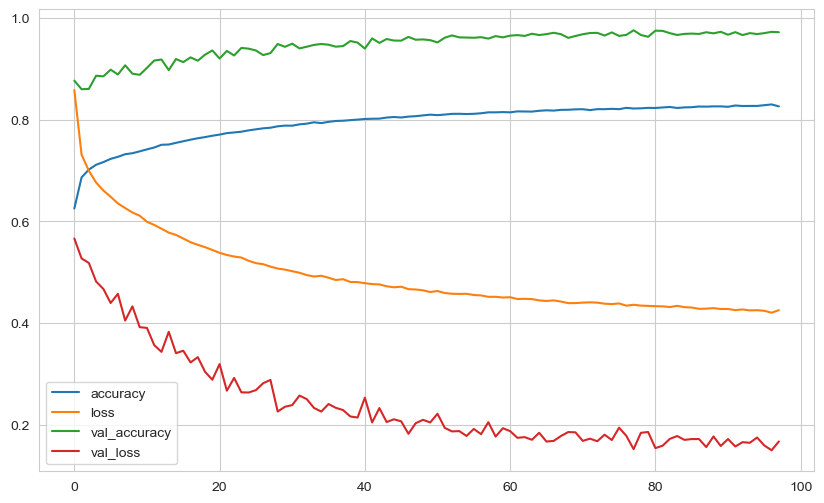

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [60]:
loss, accuracy_score = model.evaluate(X_scaled, y1_s, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy_score)

loss :  0.28857991099357605
accuracy :  0.894950270652771


In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,955 (855.30 KB)

 Trainable params: 72,579 (283.51 KB)

 Non-trainable params: 1,216 (4.75 KB)

 Optimizer params: 145,160 (567.04 KB)

In [23]:
from tensorflow.keras.saving import save_model

save_model(model, 'credit_model.keras')

# Model Prediction 

In [34]:
from tensorflow.keras.models import load_model

In [35]:
model_credit = load_model('credit_model.keras')

In [36]:
scaler_credit = pickle.load(open("scaler_credit", "rb"))

In [37]:
test_data = pd.read_csv("test_eda.csv")

In [38]:
test_data.head(2)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation_other
0,9,23,19114.120,1824.843,3,4,3,4,3,7.000,11.270,7.000,2,809.980,35.030,273,0,49.575,236.643,1,186.267,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,10,24,19114.120,1824.843,3,4,3,4,3,9.000,13.270,4.000,2,809.980,33.053,274,0,49.575,21.465,5,361.444,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
scaled_test_data = scaler_credit.transform(test_data)

In [40]:
predictions = model_credit.predict(test_data)
predictions

1420/1420 ━━━━━━━━━━━━━━━━━━━━ 1s 326us/step


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [49]:
y_pred_probabilities = model_credit.predict(scaled_test_data)
y_pred = y_pred_probabilities.argmax(axis=1)

1420/1420 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


In [50]:
test_data["pred"] = y_pred
test_data

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation_other,pred
0,9,23,19114.120,1824.843,3,4,3,4,3,7.000,11.270,7.000,2,809.980,35.030,273,0,49.575,236.643,1,186.267,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
1,10,24,19114.120,1824.843,3,4,3,4,3,9.000,13.270,4.000,2,809.980,33.053,274,0,49.575,21.465,5,361.444,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
2,11,24,19114.120,1824.843,3,4,3,4,1,4.000,12.270,4.000,2,809.980,33.812,274,0,49.575,148.234,2,264.675,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
3,12,24,19114.120,1824.843,3,4,3,4,4,5.000,11.270,4.000,2,809.980,32.431,276,0,49.575,39.083,5,343.827,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9,28,34847.840,3037.987,2,4,6,1,3,1.000,5.420,5.000,2,605.030,25.927,327,0,18.816,39.684,6,485.298,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45404,11,29,20002.880,1929.907,10,8,29,5,33,22.000,18.310,12.000,0,3571.700,27.028,78,1,60.965,50.847,4,341.179,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
45405,9,25,39628.990,1929.907,4,6,7,2,20,22.000,11.500,7.000,2,502.380,27.759,383,0,35.104,181.443,1,409.395,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
45406,10,25,39628.990,3359.416,4,6,7,2,23,5.000,13.500,7.000,2,502.380,36.859,384,0,35.104,134.122,3,349.726,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
45407,11,25,39628.990,3359.416,4,6,7,2,21,6.000,11.500,7.000,2,502.380,39.140,385,0,35.104,97.599,4,463.239,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [51]:
predictions =model_credit.predict(scaled_test_data)

normalized_predictions = tf.nn.softmax(predictions, axis=-1).numpy()

1420/1420 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


In [52]:
normalized_predictions

array([[0.23164046, 0.3140734 , 0.454286  ],
       [0.23269677, 0.33611137, 0.4311919 ],
       [0.23351346, 0.35101703, 0.4154694 ],
       ...,
       [0.51164734, 0.26404473, 0.22430792],
       [0.5122663 , 0.26368886, 0.22404486],
       [0.50820965, 0.2671618 , 0.2246285 ]], dtype=float32)

In [53]:
test_data["pred_proba_0"] = normalized_predictions[:,0]
test_data["pred_proba_1"] = normalized_predictions[:,1]
test_data["pred_proba_2"] = normalized_predictions[:,2]
test_data

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation_other,pred,pred_proba_0,pred_proba_1,pred_proba_2
0,9,23,19114.120,1824.843,3,4,3,4,3,7.000,11.270,7.000,2,809.980,35.030,273,0,49.575,236.643,1,186.267,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0.232,0.314,0.454
1,10,24,19114.120,1824.843,3,4,3,4,3,9.000,13.270,4.000,2,809.980,33.053,274,0,49.575,21.465,5,361.444,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0.233,0.336,0.431
2,11,24,19114.120,1824.843,3,4,3,4,1,4.000,12.270,4.000,2,809.980,33.812,274,0,49.575,148.234,2,264.675,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0.234,0.351,0.415
3,12,24,19114.120,1824.843,3,4,3,4,4,5.000,11.270,4.000,2,809.980,32.431,276,0,49.575,39.083,5,343.827,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.235,0.414,0.351
4,9,28,34847.840,3037.987,2,4,6,1,3,1.000,5.420,5.000,2,605.030,25.927,327,0,18.816,39.684,6,485.298,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0.235,0.373,0.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45404,11,29,20002.880,1929.907,10,8,29,5,33,22.000,18.310,12.000,0,3571.700,27.028,78,1,60.965,50.847,4,341.179,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.244,0.535,0.221
45405,9,25,39628.990,1929.907,4,6,7,2,20,22.000,11.500,7.000,2,502.380,27.759,383,0,35.104,181.443,1,409.395,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.366,0.385,0.249
45406,10,25,39628.990,3359.416,4,6,7,2,23,5.000,13.500,7.000,2,502.380,36.859,384,0,35.104,134.122,3,349.726,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.512,0.264,0.224
45407,11,25,39628.990,3359.416,4,6,7,2,21,6.000,11.500,7.000,2,502.380,39.140,385,0,35.104,97.599,4,463.239,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.512,0.264,0.224
